In [1]:
import jieba
import time
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer  
from scipy import io
import json
from joblib import load   
import csv

加载模型

In [7]:
clf=load('../../save_model/svm_model_linear.joblib')

定义分词器

In [21]:
class MessageCountVectorizer(sklearn.feature_extraction.text.CountVectorizer):
    def build_analyzer(self):
        def analyzer(doc):
            words = jieba.cut(doc)
            return words
        return analyzer

适配训练数据并且对测试数据进行分词

In [22]:
import pandas as pd 
vect = 	MessageCountVectorizer(max_df=0.9,min_df=2)
df=pd.read_csv('../data/sample3.csv')
train_content=df['content']
vect.fit(train_content)
df=pd.read_csv('../data/test.csv')
test_content=df['content']
test_content=vect.transform(test_content)


加载原标签

In [23]:
# test_content = io.mmread('../data/test_content_vector.mtx')
# label=[]
# with open('../data/test_label_vector.json', 'r') as f:
#     label = json.load(f)
label_t=[]
with open('../data/test.csv','r') as f:
    re=csv.reader(f)
    next(re)
    for row in re:
        label_t.append(int(row[0]))
# for a ,b in zip(label,label_t):
#     if a!=int(b):
#         print(a,b)


预测测试数据

In [24]:
pred=clf.predict(test_content.toarray())

In [25]:
print(type(pred))

<class 'numpy.ndarray'>


获取预测结果

In [29]:
pred_list=[]
for value in pred:
    value=int(value)
    pred_list.append(value)

获取漏报误报

In [36]:
err_dict={}
with open('../data/test.csv','r') as f:
    re=csv.reader(f)
    next(re)
    re=list(re)
    for a, b in zip (pred_list,re):
        if int(a) != int(b[0]):
            err_dict[b[1]]=int(a)

In [37]:
print(len(err_dict))

109


In [39]:
for key in err_dict.keys():
    print(key,err_dict[key])
    print('\n')

亲爱的佳人们
 0


办年审 0


西城年华小四女及望月公寓小三女作业xx元/时；西溪风情初一女英科学xx元/时；之江公寓高一女数理化xx元/时请回电神舟家教xxxxxxxx佘
 0


请把房租打到招行xxxxxxxxxxxxxxxx邹晓燕
 0


xxxx开疆拓土!现房
 0


鼓楼龙江有房 0


知音半岛·泊翠 后官湖生态宜居新城内 0


安赢系列x年期保证年利率x.xx% 0


明月新城底商排号优惠政策～东升老业主排号五万抵十万～普通客户排号五万抵八万～有需要的可以和我联系～明月新城马小龙～ 0


健康在线尤维斯产品大促全场买二送一产品购一套即再送一瓶维e
 0


信用社xxxxxxxxxxxxxxxx佘远美
 0


本公司主要经营五金冲压及其制品 0


xxxxxxoxxxxxxxxxoxo农行张玉兰
 0


玛雅国际养生会所回馈新老顾客
 0


中国电信真xG、华为Matex免费送！预存xxxx元话费即送华为xG双模手机Matex 0


办各种证件电话xxxxxxxxxxx 0


本期水一木一金野兽开一特
 0


尊敬的晋商银行客户：x月xx日前发行理财
 0


开o/o發o/o剽xxxxixxxxxx王艳
 0


xxxxxxxxxxxxxxxxx 0


d今后不用麻烦去*奥*门了
 0


应城中百蒙牛奶粉全场惊爆x
 0


惊喜x[闪电][ 厂家特惠原价xxxx元面部护理年卡xx次现只需xxxx元xx次[炸弹][炸弹][炸弹]凡在开卡时间一年内做满xx次再 0


xxx期失利的友友
 0


单击服务＞办理＞业务办理＞自由组合套餐变更
 1


豁然文化学校在职一线金牌教师一对一全科辅导质量保证xx天提升xxx分精品小班师资力量雄厚签约教学价格全市最低提分热线xxxxxxxx 0


曾经往事常回首
 0


尊敬的贵宾：元宵佳节到
 0


急用钱 0


北方国内货运代 理处欢迎您 0


我厂为饭店快餐店制造安装改装维修节能炉冰柜空调电器清洗油烟机
 0


永乐莘庄龙之梦黑色星期五满额最高送x千积分全网比价xxx%正品保障活动x月xx日至xx日沪闵路xxxx号Bx咨询电话xxxxxxxx
 0


我是刚才给您打电话的大中华置业顾问【薛野】xxxxxxxxxxx 0


亲爱的VIP
 0


出的

定义evaluate指标

In [40]:
from sklearn import metrics
def elevate_result(label,pred):
    """
    函数说明: 对分类器预测的结果进行评估，包括accurancy,precision,recall,F-score
    Parameter:
        label - 真实值
        pred - 预测值
    Return:
        None
    Modify:
        2017-12-22
    """
    con_mat = metrics.confusion_matrix(label,pred)
    TP = con_mat[1,1]
    TN = con_mat[0,0]
    FP = con_mat[0,1]
    FN = con_mat[1,0]
    
    accurancy = (TP+TN)/(TP+TN+FN+FP)
    precison = TP/(TP+FP) #精确率反应误报情况
    recall = TP/(TP+FN) # 召回率反应漏报情况
    beta = 1
    F_score = (1+pow(beta,2))*precison*recall/(pow(beta,2)*precison+recall)
    
    print("TP:",TP)
    print("TN:",TN)
    print("FP:",FP)
    print("FN:",FN) 
    print("accuracy: %s \nprecision: %s \nrecall: %s \nF-score: %s" % (accurancy,precison,recall,F_score))
    
    return [accurancy,precison,recall,F_score]


evaluate result

In [42]:
label_t=[]
with open('../data/test.csv','r') as f:
    re=csv.reader(f)
    next(re)
    for row in re:
        label_t.append(int(row[0]))
elevate_result(label_t,pred)

TP: 3861
TN: 36030
FP: 3
FN: 106
accurancy: 0.997275 
precison: 0.9992236024844721 
recall: 0.9732795563398033 
F-score: 0.9860809602860426


[0.997275, 0.9992236024844721, 0.9732795563398033, 0.9860809602860426]

输出漏报误报

In [ ]:
with open('../data/error_report.csv','w') as f:
    wr=csv.writer(f)
    wr.writerow(['pred','mess'])
    for key in err_dict:
        wr.writerow([err_dict[key],key])
    

In [2]:
df_test=pd.read_csv('../data/test.csv')
df_error=pd.read_csv('../data/error_report.csv')
correct_p_dict={}
correct_n_dict={}
err_list={}
for index,row in df_error.iterrows():
    err_list[row['mess']]=int(row['pred'])
for index,row in df_test.iterrows():
    if row['content'] not in err_list.keys() :
        if int(row['label'])==1:
            correct_p_dict[row['content']]=int(row['label']) # correct positive 
        elif int(row['label'])==0:
            correct_n_dict[row['content']]=int(row['label']) # correct negative

        


In [27]:
import pandas as pd
# import DataFrame.append as append
correct_p_df=pd.DataFrame(columns=['content','label'])
cp_list=np.array(correct_p_df).tolist()
print(type(correct_p_df))
for key in correct_p_dict.keys():
    cp_list.append([key,correct_p_dict[key]])
correct_p_df=pd.DataFrame(cp_list,columns=['content','label'])
correct_n_df=pd.DataFrame(columns=['content','label'])
cn_list=np.array(correct_n_df).tolist()
for key in correct_n_dict.keys():
    cn_list.append([key,correct_n_dict[key]])
correct_n_df=pd.DataFrame(cn_list,columns=['content','label'])
        # correct_n_df=correct_n_df.loc([
            # key,correct_n_dict[key]])

<class 'pandas.core.frame.DataFrame'>


获取正确预测的数据

In [31]:
correct_p_df.to_csv('../data/correct_positive.csv',index=False)
correct_n_df.to_csv('../data/correct_negative.csv',index=False)

正确预测数据采样

In [32]:
sample_cp_df=correct_p_df.sample(n=200)
sample_cn_df=correct_n_df.sample(n=200)

In [33]:
sample_cp_df.to_csv('../data/sample_correct_positive.csv',index=False)
sample_cn_df.to_csv('../data/sample_correct_negative.csv',index=False)

分析正确预测数据的文本长度分布（剔除长字符）

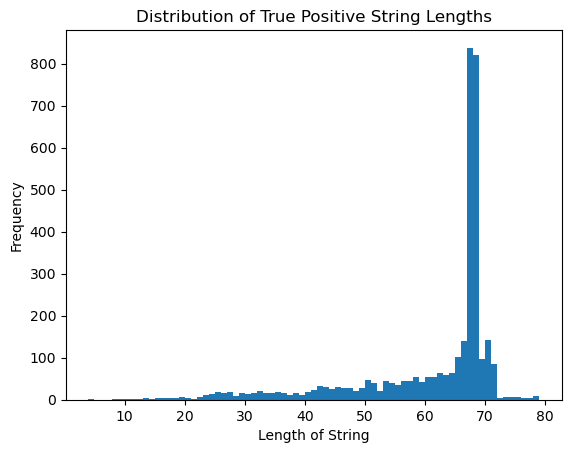

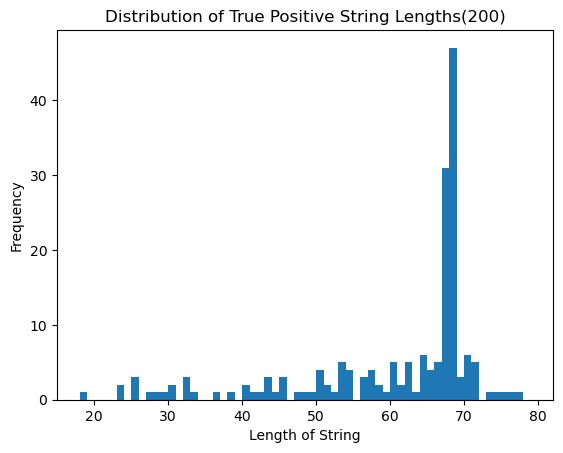

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# 假设你的字符串列表是 str_list
# str_list = ['hello', 'world', 'python', 'programming', 'assistant']
df=pd.read_csv('../data/correct_positive.csv')
str_list=df['content']

# 计算所有字符串的长度
lengths = [len(s) for s in str_list]

# 画出分布图
# plt.hist(lengths, bins=range(min(lengths), max(lengths) + 1))
# plt.xlabel('Length of String')
# plt.ylabel('Frequency')
# plt.title('Distribution of True Positive String Lengths')
# plt.show()
# plt.savefig("../SVM/result/ps_len_all.jpg")
for item in lengths:
    if item >80:
        lengths.remove(item)
plt.hist(lengths, bins=range(min(lengths), 80))
plt.xlabel('Length of String')
plt.ylabel('Frequency')
plt.title('Distribution of True Positive String Lengths')
plt.savefig("../SVM/result/ps_len_all.jpg")
plt.show()

df=pd.read_csv('../data/sample_correct_positive.csv')
str_list=df['content']

# 计算所有字符串的长度
lengths = [len(s) for s in str_list]
for item in lengths:
    if item >80:
        lengths.remove(item)
plt.hist(lengths, bins=range(min(lengths), 80))
plt.xlabel('Length of String')
plt.ylabel('Frequency')
plt.title('Distribution of True Positive String Lengths(200)')

plt.savefig("../SVM/result/ps_len_200.jpg")
plt.show()

分析漏报误报文本长度分布

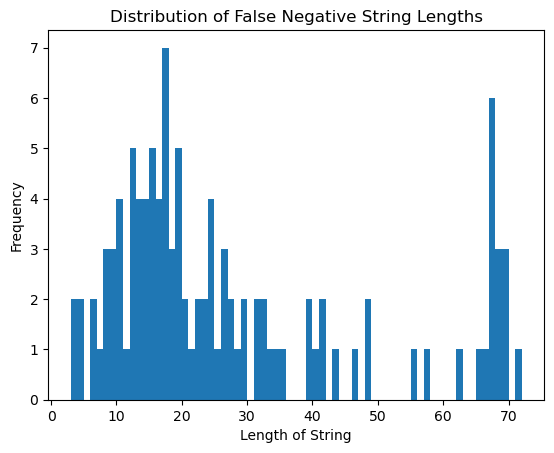

In [7]:
import matplotlib.pyplot as plt

# 假设你的字符串列表是 str_list
# str_list = ['hello', 'world', 'python', 'programming', 'assistant']
df=pd.read_csv('../data/error_report.csv')
str_list=df['mess']

# 计算所有字符串的长度
lengths = [len(s) for s in str_list]

# 画出分布图
plt.hist(lengths, bins=range(min(lengths), max(lengths) + 1))
plt.xlabel('Length of String')
plt.ylabel('Frequency')
plt.title('Distribution of False Negative String Lengths')
# plt.show()
plt.savefig("../SVM/result/fn_len_200.jpg")
plt.show()

正负样本统计

In [43]:
import pandas as pd

df=pd.read_csv('../data/sample1.csv')
label=df['label']
p_count=0
n_count=0
for item in label:
    if int(item)==0:
        n_count+=1
    else:
        p_count+=1
print('positive:',p_count)
print ('negative:',n_count)

positive: 1041
negative: 8959


In [44]:
import pandas as pd

df=pd.read_csv('../data/sample2.csv')
label=df['label']
p_count=0
n_count=0
for item in label:
    if int(item)==0:
        n_count+=1
    else:
        p_count+=1
print('positive:',p_count)
print ('negative:',n_count)

positive: 1508
negative: 13492


In [45]:
import pandas as pd

df=pd.read_csv('../data/sample3.csv')
label=df['label']
p_count=0
n_count=0
for item in label:
    if int(item)==0:
        n_count+=1
    else:
        p_count+=1
print('positive:',p_count)
print ('negative:',n_count)

positive: 1962
negative: 18038


# 接下来是利用最后的模型对于200W+条短信进行预测评估

使用jieba定义分词器

In [2]:
class MessageCountVectorizer(sklearn.feature_extraction.text.CountVectorizer):
    def build_analyzer(self):
        def analyzer(doc):
            words = jieba.cut(doc)
            return words
        return analyzer

创建分词器并适配训练数据特征数

In [3]:
vect = 	MessageCountVectorizer(max_df=0.9,min_df=2)
df=pd.read_csv('../data/sample3.csv')
train_content=df['content']
vect.fit(train_content)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Dumping model to file cache /tmp/jieba.cache
Dump cache file failed.
Traceback (most recent call last):
  File "/home/ydoit/.local/lib/python3.11/site-packages/jieba/__init__.py", line 154, in initialize
    _replace_file(fpath, cache_file)
PermissionError: [Errno 1] Operation not permitted: '/tmp/tmp39kr302j' -> '/tmp/jieba.cache'
Loading model cost 0.545 seconds.
Prefix dict has been built successfully.


MessageCountVectorizer(max_df=0.9, min_df=2)

读取数据文件 并选出其中不在训练数据中的数据

In [11]:
data1=pd.read_csv('../../datasets/spam.csv')
data2=pd.read_csv('../../datasets/sms_pub.csv')
train_df=pd.read_csv('../data/sample3.csv')
train_dict={}
for index,row in train_df.iterrows():
    train_dict[row['content']]=int(row['label'])
count=0
temple_dict={}
for index,row in data1.iterrows():
    if row['content'] not in train_dict.keys():
        temple_dict[row['content']]=int(row['label'])
for index,row in data2.iterrows():
    if row['message'] not in train_dict.keys():
        temple_dict[row['message']]=int(row['label'])
temple_list=[]
label_list=[]
for key in temple_dict:
    temple_list.append([key,temple_dict[key]])
    label_list.append(temple_dict[key])
df=pd.DataFrame(temple_list,columns=['content','label'])  
test_content=df['content']



对测试数据进行分词

In [12]:
print('start gen vec...\n')
from datetime import datetime as dt 
current_time = dt.now().strftime('%Y-%m-%d %H:%M:%S')  
print('current_time: ',current_time)
test_content=vect.transform(test_content)
print('end gen vec...\n')
current_time = dt.now().strftime('%Y-%m-%d %H:%M:%S') 
print('current_time: ',current_time)

start gen vec...

current_time:  2024-03-25 13:35:21
end gen vec...

current_time:  2024-03-25 13:37:37


原标签

In [13]:
label_list=df['label'].to_list()

加载模型并进行预测

In [15]:
clf=load('../../save_model/svm_model_linear.joblib')
pred=clf.predict(test_content.toarray())
pred_list=[]
for value in pred:
    value=int(value)
    pred_list.append(value)